In [1]:
# https://www.bts.gov/explore-topics-and-geography/geography/border-crossingentry-data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_BorderDat = pd.read_csv('Border_Crossing_Entry_Data.csv')
df_BorderDat.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Roma,Texas,2310,US-Mexico Border,Dec 2023,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928)
1,Del Rio,Texas,2302,US-Mexico Border,Dec 2023,Trucks,6552,29.327,-100.928,POINT (-100.927612 29.326784)
2,Roma,Texas,2310,US-Mexico Border,Nov 2023,Trucks,3753,26.404,-99.019,POINT (-99.018981 26.403928)
3,Douglas,Arizona,2601,US-Mexico Border,Oct 2023,Buses,13,31.334,-109.560,POINT (-109.560344 31.334043)
4,Beecher Falls,Vermont,206,US-Canada Border,Aug 2023,Trucks,422,45.013,-71.505,POINT (-71.505309 45.013411)


In [2]:
df_BorderDat['Measure'].value_counts() # checking unique value counts in Measure column

Measure
Personal Vehicles              36824
Personal Vehicle Passengers    36798
Trucks                         35813
Truck Containers Empty         35647
Truck Containers Loaded        35187
Pedestrians                    32133
Buses                          31242
Bus Passengers                 31225
Trains                         29567
Rail Containers Empty          29545
Rail Containers Loaded         29457
Train Passengers               29122
Name: count, dtype: int64

In [3]:
# shows me the Measure values in order of the most occurring in the data set

# check .info on dataset to see data types and if there are any null values
df_BorderDat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392560 entries, 0 to 392559
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Port Name  392560 non-null  object 
 1   State      392560 non-null  object 
 2   Port Code  392560 non-null  int64  
 3   Border     392560 non-null  object 
 4   Date       392560 non-null  object 
 5   Measure    392560 non-null  object 
 6   Value      392560 non-null  int64  
 7   Latitude   392560 non-null  float64
 8   Longitude  392560 non-null  float64
 9   Point      392560 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 30.0+ MB


In [5]:
# noticing the Date column is currently object dtype, Value is an integer

# get .describe summary for object data type columns
df_BorderDat.describe(include='object').T

,count,unique,top,freq
Port Name,392560,116,Eastport,6590
State,392560,14,North Dakota,63435
Border,392560,2,US-Canada Border,300082
Date,392560,341,Sep 2010,1356
Measure,392560,12,Personal Vehicles,36824
Point,392560,116,POINT (-115.388018 32.673389),7290


In [7]:
# get .describe summary for numeric data type columns
df_BorderDat.describe().T

,count,mean,std,min,25%,50%,75%,max
Port Code,392560.0,2447.064619,1203.924195,101.000,2304.000,3012.000,3401.000,3814.000
Value,392560.0,28748.773051,149598.956130,0.000,0.000,139.000,2941.000,4447374.000
Latitude,392560.0,43.978358,8.150457,25.952,42.999,48.122,49.000,62.615
Longitude,392560.0,-99.738763,18.255883,-141.001,-114.728,-101.628,-89.585,-66.980


In [6]:
# not sure there's anything super meaningful in that, however

# double check if any null values exist in any columns
df_BorderDat.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Latitude     0
Longitude    0
Point        0
dtype: int64

In [9]:
# according to documentation, people are counted in the passengers and pedestrians Measures,
# whereas vehicles and equipment are counted in the other ones. i'm interested in where people are 
# coming in and needing customs processing

df_PassengerPeds = df_BorderDat[(df_BorderDat['Measure'].str.contains('Passengers')) | (df_BorderDat['Measure'].str.contains('Pedestrians'))]

df_PassengerPeds.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
9,Roma,Texas,2310,US-Mexico Border,Jul 2023,Bus Passengers,949,26.404,-99.019,POINT (-99.018981 26.403928)
20,Roma,Texas,2310,US-Mexico Border,Dec 2022,Pedestrians,18614,26.404,-99.019,POINT (-99.018981 26.403928)
24,Laredo,Texas,2304,US-Mexico Border,Sep 2022,Bus Passengers,51236,27.500,-99.507,POINT (-99.507412 27.499561)
42,Douglas,Arizona,2601,US-Mexico Border,Jul 2021,Pedestrians,24290,31.334,-109.560,POINT (-109.560344 31.334043)
49,Van Buren,Maine,108,US-Canada Border,Feb 2021,Train Passengers,72,47.160,-67.931,POINT (-67.930799 47.159645)


In [11]:
df_PassengerPeds.shape # quick check how big the passenger/pedestrian data set is

(129278, 10)

In [13]:
# let's see which ports are appearing most and least frequently in this set
df_PassengerPeds[['Port Name', 'State']].value_counts()

Port Name               State       
Buffalo Niagara Falls   New York        1353
Champlain Rouses Point  New York        1344
Portal                  North Dakota    1341
International Falls     Minnesota       1341
Nogales                 Arizona         1338
                                        ... 
Bar Harbor              Maine            369
Boquillas               Texas            138
Ysleta                  Texas             96
Cross Border Xpress     California        80
Algonac                 Michigan          30
Name: count, Length: 117, dtype: int64

In [15]:
# notable (in hindsight) that Ysleta, Cross Border Xpress, and Algonac are the ports appearing 
# the least number of times in the data set

# let's see the top 5 totals of Value by Port Name for US-Mexico border
df_PassengerPeds[df_PassengerPeds['Border'].str.contains('Mexico')].groupby('Port Name')['Value'].sum().sort_values(ascending=False).head(5)

Port Name
San Ysidro    967682977
El Paso       895887049
Laredo        489435701
Hidalgo       452984318
Calexico      451162335
Name: Value, dtype: int64

In [17]:
# let's see the top 5 totals of Value by Port Name for US-Canada border
df_PassengerPeds[df_PassengerPeds['Border'].str.contains('Canada')].groupby('Port Name')['Value'].sum().sort_values(ascending=False).head(5)

Port Name
Buffalo Niagara Falls     381206789
Detroit                   296342939
Blaine                    202971944
Port Huron                106175415
Champlain Rouses Point     78226858
Name: Value, dtype: int64

In [19]:
# let's see the top totals of Value by Measure for US-Mexico border
df_PassengerPeds[df_PassengerPeds['Border'].str.contains('Mexico')].groupby('Measure')['Value'].sum().sort_values(ascending=False).head(5)

Measure
Personal Vehicle Passengers    4518496313
Pedestrians                    1212910911
Bus Passengers                   77119388
Train Passengers                   354071
Name: Value, dtype: int64

In [21]:
# let's see the top totals of Value by Measure for US-Canada border
df_PassengerPeds[df_PassengerPeds['Border'].str.contains('Canada')].groupby('Measure')['Value'].sum().sort_values(ascending=False).head(5)

Measure
Personal Vehicle Passengers    1679687326
Bus Passengers                   77759530
Pedestrians                      14004931
Train Passengers                  6627043
Name: Value, dtype: int64

In [23]:
# Personal Vehicle Passengers have seen by far the greatest crossing counts at each border
# notable is how many more passenger crossing there are at the southern border, bus passengers is 
# very similar, and train passengers are much greater across the northern border

# to continue analysis, let's transform Date from object into datetime type and extract Year and Month into their own columns
df_PassengerPeds['Date'] = pd.to_datetime(df_PassengerPeds['Date'])
df_PassengerPeds['Year'] = df_PassengerPeds['Date'].dt.year
df_PassengerPeds['Month'] = df_PassengerPeds['Date'].dt.month

df_PassengerPeds.head()

/var/folders/7h/s835_rfs5hq90_9k1clks2vw0000gn/T/ipykernel_37669/1277337700.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_PassengerPeds['Date'] = pd.to_datetime(df_PassengerPeds['Date'])
/var/folders/7h/s835_rfs5hq90_9k1clks2vw0000gn/T/ipykernel_37669/1277337700.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PassengerPeds['Date'] = pd.to_datetime(df_PassengerPeds['Date'])
/var/folders/7h/s835_rfs5hq90_9k1clks2vw0000gn/T/ipykernel_37669/1277337700.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point,Year,Month
9,Roma,Texas,2310,US-Mexico Border,2023-07-01,Bus Passengers,949,26.404,-99.019,POINT (-99.018981 26.403928),2023,7
20,Roma,Texas,2310,US-Mexico Border,2022-12-01,Pedestrians,18614,26.404,-99.019,POINT (-99.018981 26.403928),2022,12
24,Laredo,Texas,2304,US-Mexico Border,2022-09-01,Bus Passengers,51236,27.500,-99.507,POINT (-99.507412 27.499561),2022,9
42,Douglas,Arizona,2601,US-Mexico Border,2021-07-01,Pedestrians,24290,31.334,-109.560,POINT (-109.560344 31.334043),2021,7
49,Van Buren,Maine,108,US-Canada Border,2021-02-01,Train Passengers,72,47.160,-67.931,POINT (-67.930799 47.159645),2021,2


In [25]:
# now we can total by Month to see overall most popular months for crossing US-Mexico border
df_PassengerPeds[df_PassengerPeds['Border'].str.contains('Mexico')].groupby('Month')['Value'].sum().sort_values(ascending=False).head(5)


Month
3     516785427
12    516567568
5     499294235
1     495615109
7     492353262
Name: Value, dtype: int64

In [29]:
# we can also average by Month to see overall most popular months for crossing US-Mexico border
df_PassengerPeds[df_PassengerPeds['Border'].str.contains('Mexico')].groupby('Month')['Value'].mean().sort_values(ascending=False).head(5)


Month
12    200530.888199
3     193552.594382
7     189585.391606
8     189548.143135
5     186791.707819
Name: Value, dtype: float64

In [31]:
# for raw totals, we see March, Decmber, May; for average monthly crossings, we see December, March, July

# now we can total by Month to see overall most popular months for crossing US-Canada border
df_PassengerPeds[df_PassengerPeds['Border'].str.contains('Canada')].groupby('Month')['Value'].sum().sort_values(ascending=False).head(5)


Month
8    212991666
7    205964419
6    163281629
5    155340808
9    155118913
Name: Value, dtype: int64

In [33]:
# we can also average by Month to see overall most popular months for crossing US-Mexico border
df_PassengerPeds[df_PassengerPeds['Border'].str.contains('Canada')].groupby('Month')['Value'].mean().sort_values(ascending=False).head(5)


Month
8    26386.479931
7    25206.757924
6    19953.761334
9    19224.056637
5    18690.988810
Name: Value, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

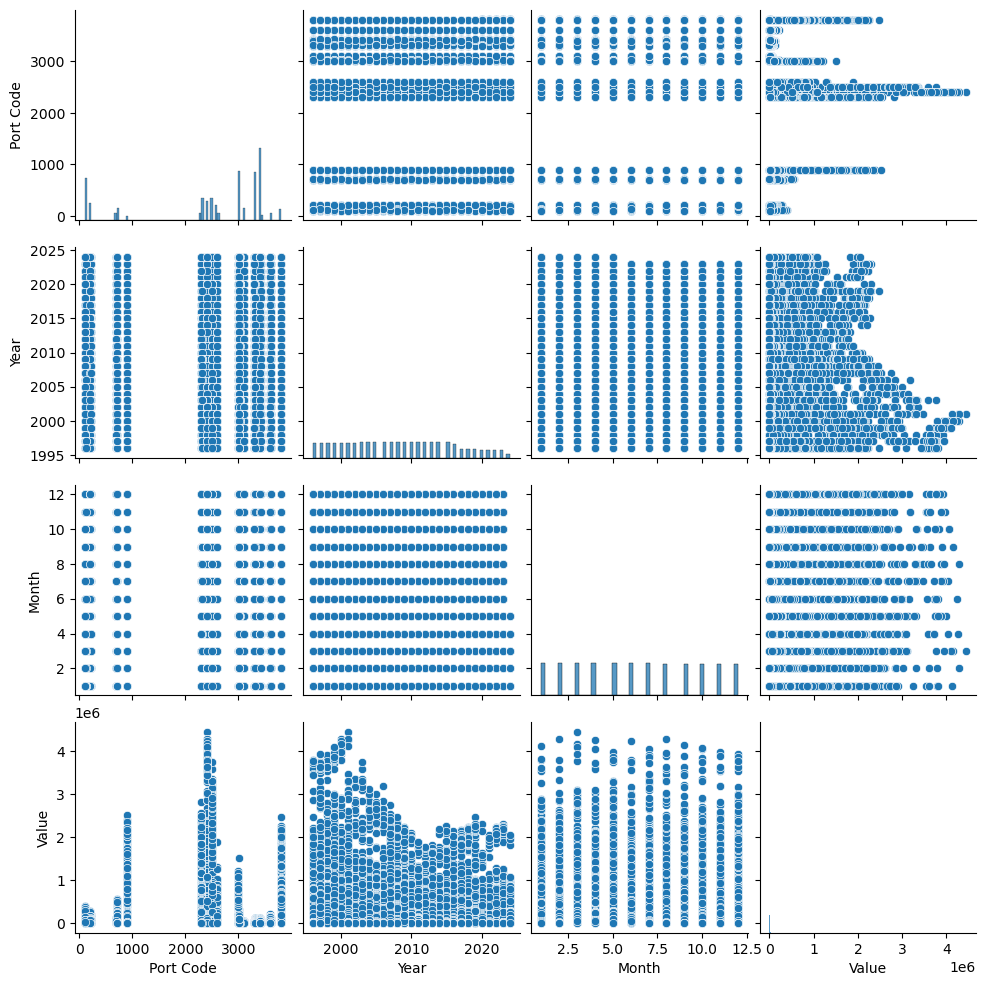

In [35]:
# for raw totals, we see August, July, June; for average monthly crossings, we also see August, July, June
# that dichotomy of ir/regular seasonality could be worth further investigation

# for my analysis, i'm deciding to drop the location-related data and restrict my set to port and border information
# in the future, I can imagine a mapping visualization being interesting to put together
df_PasPed = df_PassengerPeds[['Port Name', 'State', 'Port Code', 'Border', 'Year', 'Month', 'Measure', 'Value']]

sns.pairplot(df_PasPed)    # we'll look at the seaborn pairplot to see if any potential patterns/trends emerge

In [37]:
# hm. not a ton jumps out, but I do see an overall downward slope on the plots comparing Value and Year
# indicating a decrease in crossings in the timespan of the overall data set, which is surprising to me

# out of curiosity, what are all my Port Names?
df_PasPed['Port Name'].unique()

array(['Roma', 'Laredo', 'Douglas', 'Van Buren', 'Morgan',
       'Grand Portage', 'Brownsville', 'Alcan', 'Eastport', 'Calais',
       'Danville', 'Warroad', 'Scobey', 'Hansboro', 'Roseau', 'Roosville',
       'Neche', 'Antler', 'Del Rio', 'Metaline Falls', 'Noonan',
       'Houlton', 'Wildhorse', 'Maida', 'Eagle Pass', 'Hannah', 'Turner',
       'Ferry', 'Sherwood', 'Whitlash', 'Raymond', 'Vanceboro',
       'Progreso', 'Blaine', 'Alexandria Bay', 'Sault Sainte Marie',
       'Dunseith', 'Bridgewater', 'Opheim', 'Detroit', 'Carbury',
       'Portland', 'Presidio', 'Northgate', 'Dalton Cache', 'Sumas',
       'Nogales', 'Noyes', 'Fort Kent', 'Westhope', 'El Paso', 'Walhalla',
       'Rio Grande City', 'Andrade', 'San Luis', 'Port Angeles', 'Ysleta',
       'Port Huron', 'Kenneth G Ward', 'Point Roberts',
       'International Falls', 'Pinecreek', 'Skagway', 'Ambrose',
       'San Ysidro', 'Lancaster', 'Richford', 'Calexico', 'Massena',
       'Trout River', 'Buffalo Niagara Falls', 'F

In [39]:
# also out of curiosity, what are all the states with ports?
df_PasPed['State'].unique()

array(['Texas', 'Arizona', 'Maine', 'Montana', 'Minnesota', 'Alaska',
       'Idaho', 'Washington', 'North Dakota', 'New York', 'Michigan',
       'California', 'Vermont', 'New Mexico'], dtype=object)

In [41]:
# let's see the Value sums by Year at each Border
df_PasPed.groupby(['Border', 'Year'])['Value'].sum()

Border            Year
US-Canada Border  1996    105762398
                  1997     97570223
                  1998     93097261
                  1999     94573669
                  2000     95776909
                  2001     80433778
                  2002     74539094
                  2003     67092234
                  2004     68215987
                  2005     67205812
                  2006     67264835
                  2007     62765526
                  2008     61561658
                  2009     56625807
                  2010     59885377
                  2011     62319454
                  2012     65137704
                  2013     65436148
                  2014     62648209
                  2015     54892052
                  2016     52500249
                  2017     52736731
                  2018     54032240
                  2019     53697146
                  2020     10322045
                  2021      6509699
                  2022     27616715
     

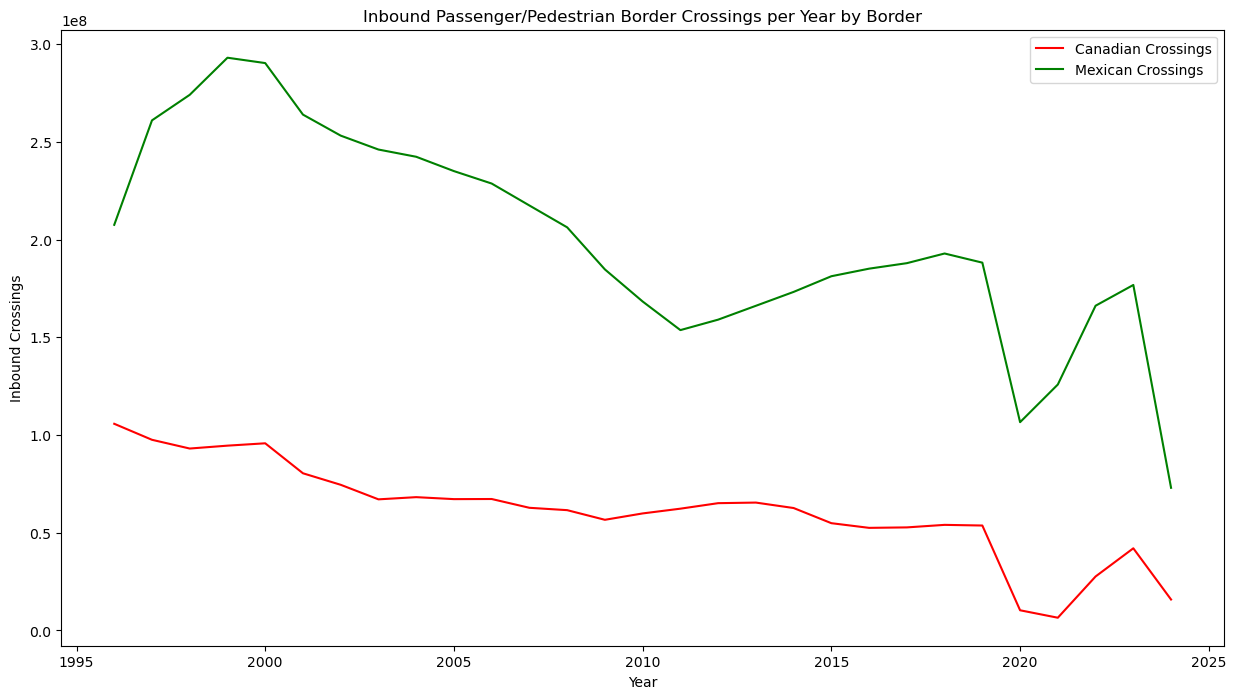

In [43]:
# let's get subsets for Border, Port Name, Measure, and Month by Year
border_grouped_df = df_PasPed.groupby(['Border', 'Year'])['Value'].sum().reset_index()
port_grouped_df = df_PasPed.groupby(['Port Name', 'Border', 'Year'])['Value'].sum().reset_index()
measure_grouped_df = df_PasPed.groupby(['Measure', 'Border', 'Year'])['Value'].sum().reset_index()
month_grouped_df = df_PasPed.groupby(['Year', 'Month', 'Border', 'Port Name'])['Value'].sum().reset_index()

# let's have dataframes filtered by each border
canada_df = border_grouped_df[border_grouped_df['Border'] == 'US-Canada Border']
mexico_df = border_grouped_df[border_grouped_df['Border'] == 'US-Mexico Border']

# plot for overall Canadian and Mexican crossings for the entire dataset timeframe
plt.figure(figsize=(15, 8))
plt.plot(canada_df['Year'], canada_df['Value'], label='Canadian Crossings', color='red')
plt.plot(mexico_df['Year'], mexico_df['Value'], label='Mexican Crossings', color='green')

plt.xlabel('Year')
plt.ylabel('Inbound Crossings')
plt.title('Inbound Passenger/Pedestrian Border Crossings per Year by Border')
plt.legend()
plt.show()

/var/folders/7h/s835_rfs5hq90_9k1clks2vw0000gn/T/ipykernel_37669/4125137828.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada_monthly['YearMonth'] = canada_monthly['Year'].astype(str) + '-' + canada_monthly['Month'].astype(str).str.zfill(2)
/var/folders/7h/s835_rfs5hq90_9k1clks2vw0000gn/T/ipykernel_37669/4125137828.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mexico_monthly['YearMonth'] = mexico_monthly['Year'].astype(str) + '-' + mexico_monthly['Month'].astype(str).str.zfill(2)
/var/folder

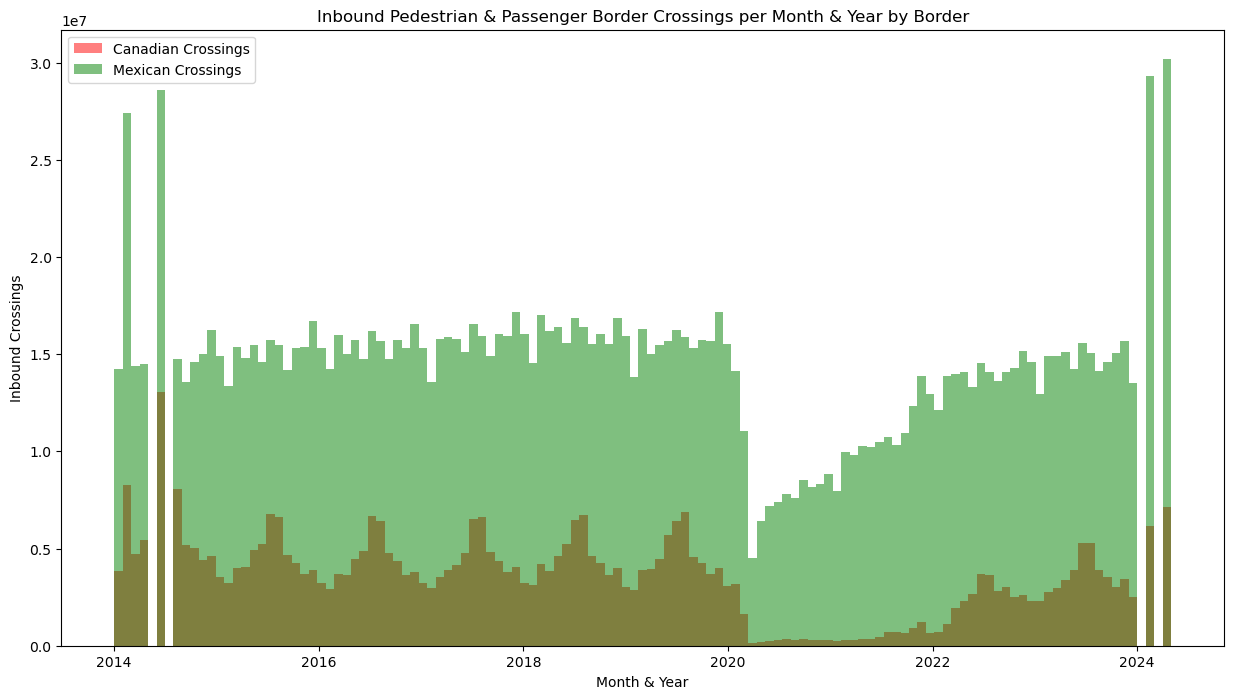

In [45]:
# this goes back a while. i think i'm going to just focus on the last 10 years

# i'd like to plot a histogram of monthly crossings at each border
# filtering data for Canada and Mexico from 2014 onwards
canada_monthly = month_grouped_df[(month_grouped_df['Year'] > 2013) & (month_grouped_df['Border'] == 'US-Canada Border')]
mexico_monthly = month_grouped_df[(month_grouped_df['Year'] > 2013) & (month_grouped_df['Border'] == 'US-Mexico Border')]

# creating a new column to combine Year and Month for the x-axis
canada_monthly['YearMonth'] = canada_monthly['Year'].astype(str) + '-' + canada_monthly['Month'].astype(str).str.zfill(2)
mexico_monthly['YearMonth'] = mexico_monthly['Year'].astype(str) + '-' + mexico_monthly['Month'].astype(str).str.zfill(2)

# convert YearMonth to datetime for proper ordering
canada_monthly['YearMonth'] = pd.to_datetime(canada_monthly['YearMonth'], format='%Y-%m')
mexico_monthly['YearMonth'] = pd.to_datetime(mexico_monthly['YearMonth'], format='%Y-%m')

# sort data by YearMonth
canada_monthly = canada_monthly.sort_values('YearMonth')
mexico_monthly = mexico_monthly.sort_values('YearMonth')

# Plotting
plt.figure(figsize=(15, 8))

# Plot histograms
plt.hist(canada_monthly['YearMonth'], weights=canada_monthly['Value'], bins=len(canada_monthly['YearMonth'].unique()), alpha=0.5, label='Canadian Crossings', color='red')
plt.hist(mexico_monthly['YearMonth'], weights=mexico_monthly['Value'], bins=len(mexico_monthly['YearMonth'].unique()), alpha=0.5, label='Mexican Crossings', color='green')

plt.xlabel('Month & Year')
plt.ylabel('Inbound Crossings')
plt.title('Inbound Pedestrian & Passenger Border Crossings per Month & Year by Border')
plt.legend()
plt.show()

In [55]:
# we see the regularity of seasonality for Canada crossings and a sort of popcorny flutter for Mexico crossings
# also interesting is the months with missing data and the anomalous months that seems to include data for mult-
# iple months; hindsight observation: should probabaly not have included 2024 in analysis, since there's irregularity
# in reporting as well as it being an incomplete year

# let's see which port leaders on the Mexico border exist for this shorter timeframe
mexico_monthly.groupby('Port Name')['Value'].sum().sort_values(ascending=False).head(5)

Port Name
San Ysidro    325579126
El Paso       235500773
Otay Mesa     145322915
Laredo        136827963
Calexico      116598425
Name: Value, dtype: int64

In [57]:
# still see San Ysidro topping the list here

# let's see which port leaders on the Canada border exist for this shorter timeframe
canada_monthly.groupby('Port Name')['Value'].sum().sort_values(ascending=False).head(5)

Port Name
Buffalo Niagara Falls     90246579
Blaine                    66109013
Detroit                   58905299
Port Huron                24713979
Champlain Rouses Point    21811971
Name: Value, dtype: int64

In [59]:
# still see Buffalo Niagara topping the list here

# let's see if there's a difference in popular months for crossing the Mexican border in the shorter timeframe
mexico_monthly.groupby('Month')['Value'].mean().sort_values(ascending=False).head(5)

Month
12    574007.063433
3     545460.013605
7     541012.344569
1     536188.740614
8     533022.635338
Name: Value, dtype: float64

In [61]:
# we see a winter cluster (December, January), a summer cluster (July, August), and a spring (March)

# and now any difference in popular months for crossing the Canada border in the shorter timeframe
canada_monthly.groupby('Month')['Value'].mean().sort_values(ascending=False).head(5)

Month
8    62304.035237
7    60581.897686
6    47446.133983
9    44179.585662
5    42446.564444
Name: Value, dtype: float64

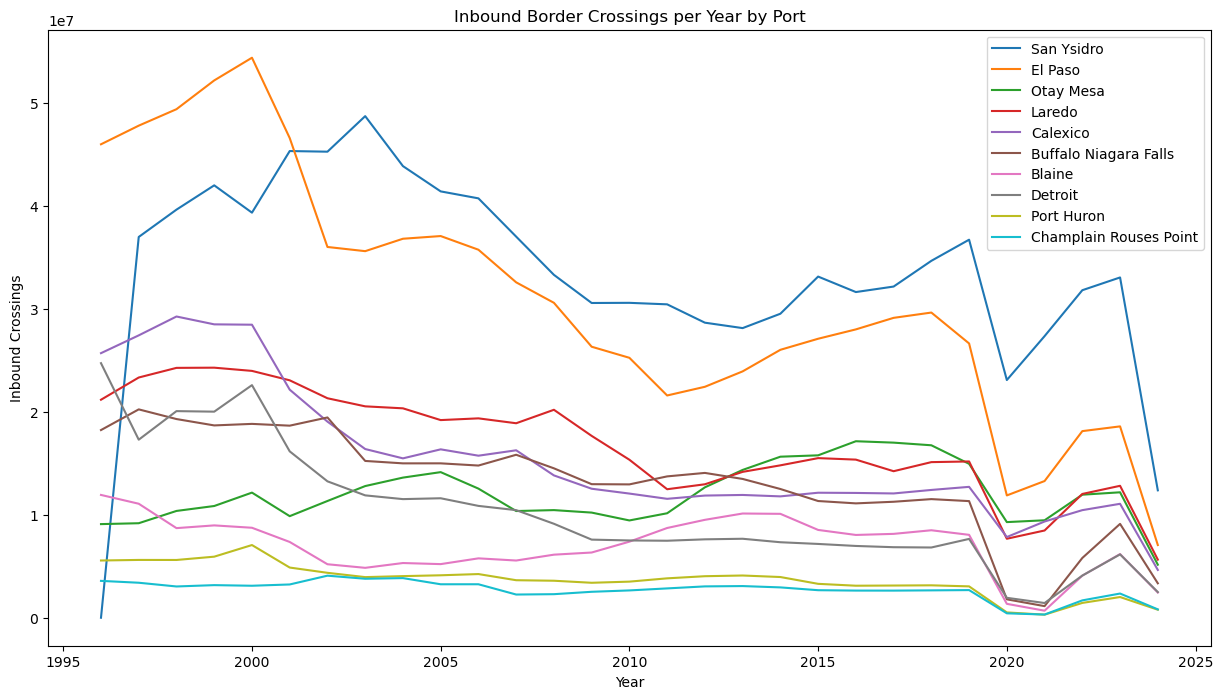

In [63]:
# still a solid block from May to September, peaking in July and August

# lets see a plot of these top ports
plt.figure(figsize=(15, 8))

# Plot lines for each port
for port in ['San Ysidro', 'El Paso', 'Otay Mesa', 'Laredo', 'Calexico', 'Buffalo Niagara Falls', 'Blaine', 'Detroit', 'Port Huron', 'Champlain Rouses Point']:
    port_df = port_grouped_df[port_grouped_df['Port Name'] == port]
    plt.plot(port_df['Year'], port_df['Value'], label=port)

plt.xlabel('Year')
plt.ylabel('Inbound Crossings')
plt.title('Inbound Border Crossings per Year by Port')
plt.legend(loc='best')
plt.show()

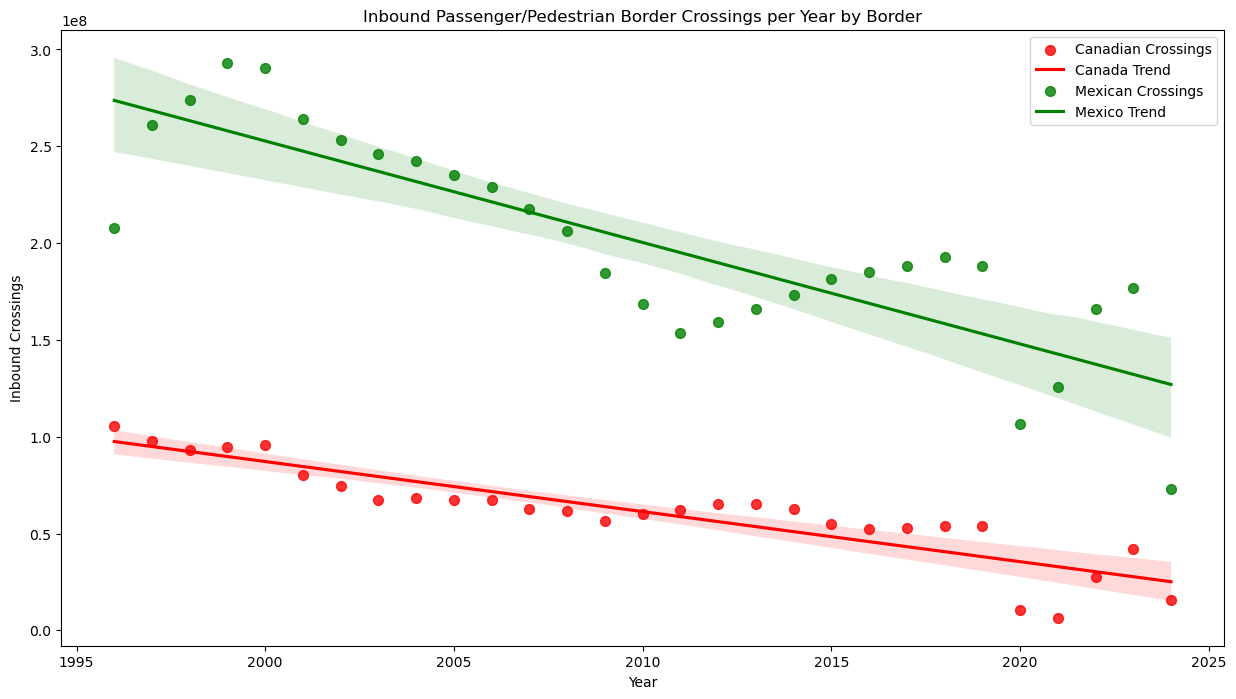

In [71]:
# we'll take a look at the overall yearly trend is at each border using regplot.
# but i'm becoming curious about any ports that are seeing an opposite trend

# Plotting
plt.figure(figsize=(15, 8))

# Plot Canadian Crossings with regression line
sns.regplot(x='Year', y='Value', data=canada_df, label='Canadian Crossings', color='red', scatter_kws={'s':50}, line_kws={'label':"Canada Trend"})

# Plot Mexican Crossings with regression line
sns.regplot(x='Year', y='Value', data=mexico_df, label='Mexican Crossings', color='green', scatter_kws={'s':50}, line_kws={'label':"Mexico Trend"})

plt.xlabel('Year')
plt.ylabel('Inbound Crossings')
plt.title('Inbound Passenger/Pedestrian Border Crossings per Year by Border')
plt.legend()
plt.show()

In [73]:
# there's a lot of history, but let's limit this to the last 10 years, for scope
df_PasPed = df_PasPed[df_PasPed['Year'] > 2013]
canada_df = canada_df[canada_df['Year'] > 2013]
mexico_df = mexico_df[mexico_df['Year'] > 2013]
port_grouped_df = port_grouped_df[port_grouped_df['Year'] > 2013]
port_grouped_df.head()

,Port Name,Border,Year,Value
18,Alcan,US-Canada Border,2014,82808
19,Alcan,US-Canada Border,2015,103473
20,Alcan,US-Canada Border,2016,120065
21,Alcan,US-Canada Border,2017,117063
22,Alcan,US-Canada Border,2018,136169


In [75]:
# now we want to identify ports that are trending the opposite direction as the overall border trend

from scipy.stats import linregress

# calculate the slope of the trend
def calculate_trend(df, x_col, y_col):
    slope, intercept, r_value, p_value, std_err = linregress(df[x_col], df[y_col])
    return slope

# calculate overall border trends
canada_overall_slope = calculate_trend(canada_df, 'Year', 'Value')
mexico_overall_slope = calculate_trend(mexico_df, 'Year', 'Value')

# check if a port's trend goes against the overall trend
def port_trend_against_overall(df, overall_slope):
    port_slopes = df.groupby('Port Name').apply(lambda x: calculate_trend(x, 'Year', 'Value')).reset_index()
    port_slopes.columns = ['Port Name', 'Slope']
    # Filter slopes that go against the overall slope
    against_trend_slopes = port_slopes[port_slopes['Slope'] * overall_slope < 0]
    
    # Sort by the absolute value of slopes in descending order
    against_trend_slopes['AbsSlope'] = against_trend_slopes['Slope'].abs()
    sorted_against_trend = against_trend_slopes.sort_values(by='AbsSlope', ascending=False).drop(columns=['AbsSlope'])
    
    return sorted_against_trend


# Identify ports with trends against the overall trend
canada_ports_against_trend = port_trend_against_overall(port_grouped_df[port_grouped_df['Border'] == 'US-Canada Border'], canada_overall_slope)
mexico_ports_against_trend = port_trend_against_overall(port_grouped_df[port_grouped_df['Border'] == 'US-Mexico Border'], mexico_overall_slope)

# alexbayslope = calculate_trend(df_PasPed[df_PasPed['Port Name'] == 'Alexandria Bay'], 'Year', 'Value')

# Print the results
print("Canada overall slope is: " + str(canada_overall_slope))
print("Mexico overall slope is: " + str(mexico_overall_slope))
# print("Alexandria Bay slope is: " + str(alexbayslope))
print("Ports on the US-Canada Border with trends against the overall trend:")
print(canada_ports_against_trend)

print("\nPorts on the US-Mexico Border with trends against the overall trend:")
print(mexico_ports_against_trend)


Canada overall slope is: -4512396.709090909
Mexico overall slope is: -7151331.636363636
Ports on the US-Canada Border with trends against the overall trend:
        Port Name         Slope
2         Algonac  10494.700000
63       Portland    432.600000
28  Friday Harbor     81.571429

Ports on the US-Mexico Border with trends against the overall trend:
              Port Name          Slope
27               Ysleta  329048.500000
6   Cross Border Xpress  136562.952381
26             Tornillo   12408.254545


/var/folders/7h/s835_rfs5hq90_9k1clks2vw0000gn/T/ipykernel_37669/3680912238.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  against_trend_slopes['AbsSlope'] = against_trend_slopes['Slope'].abs()
/var/folders/7h/s835_rfs5hq90_9k1clks2vw0000gn/T/ipykernel_37669/3680912238.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  against_trend_slopes['AbsSlope'] = against_trend_slopes['Slope'].abs()


In [77]:
# filter the df_PasPed dataframes by opposite trending ports
opp_trend_canada = df_PasPed[df_PasPed['Port Name'].isin(canada_ports_against_trend['Port Name'])]
opp_trend_mexico = df_PasPed[df_PasPed['Port Name'].isin(mexico_ports_against_trend['Port Name'])]
opp_trend_mexico.head()

,Port Name,State,Port Code,Border,Year,Month,Measure,Value
745,Ysleta,Texas,2401,US-Mexico Border,2022,11,Pedestrians,114347
933,Ysleta,Texas,2401,US-Mexico Border,2022,8,Personal Vehicle Passengers,464907
1148,Cross Border Xpress,California,2582,US-Mexico Border,2023,1,Pedestrians,228403
1322,Tornillo,Texas,2404,US-Mexico Border,2021,1,Pedestrians,876
1528,Ysleta,Texas,2401,US-Mexico Border,2023,10,Pedestrians,93080


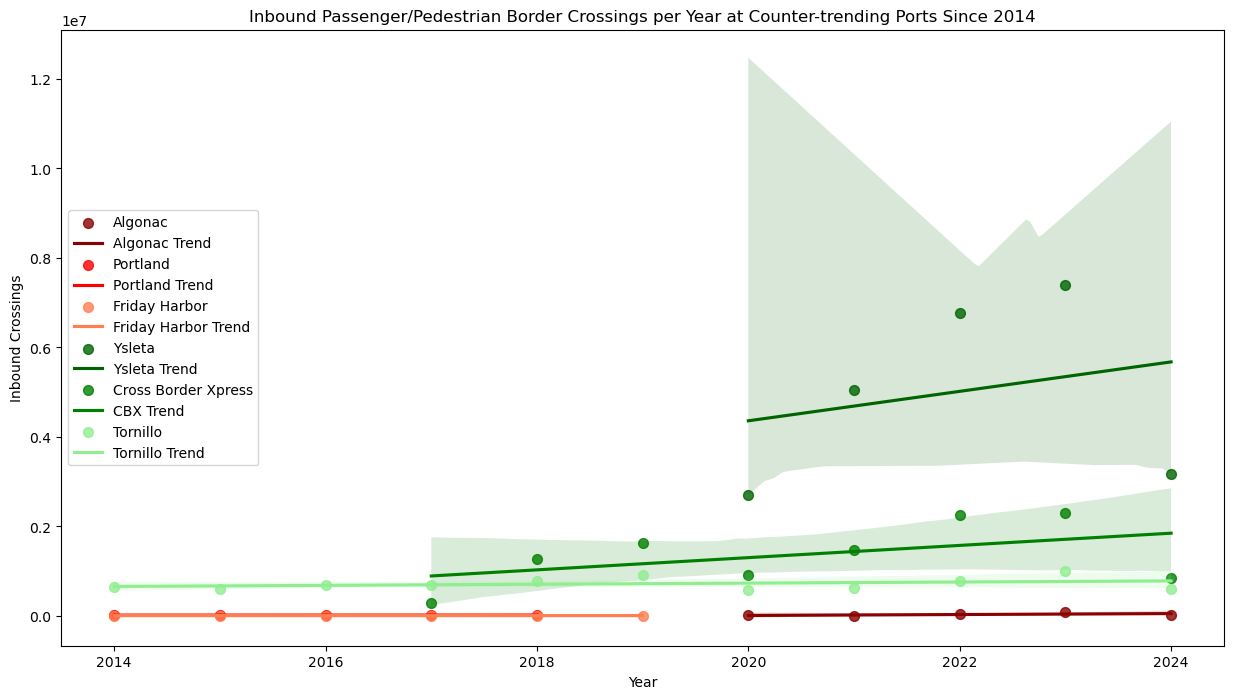

In [79]:
# now let's plot the ports that have trended in the opposite direction of the borders overall

# Group by Port Name and Year to get value totals
ca_port_groups_df = opp_trend_canada.groupby(['Port Name', 'Year'])['Value'].sum().reset_index()
mx_port_groups_df = opp_trend_mexico.groupby(['Port Name', 'Year'])['Value'].sum().reset_index()

# separate dataframes for each port top 3 at each border
# Create separate dataframes for each border
algonac_df = ca_port_groups_df[ca_port_groups_df['Port Name'] == 'Algonac']
portland_df = ca_port_groups_df[ca_port_groups_df['Port Name'] == 'Portland']
fridayhar_df = ca_port_groups_df[ca_port_groups_df['Port Name'] == 'Friday Harbor']

ysleta_df = mx_port_groups_df[mx_port_groups_df['Port Name'] == 'Ysleta']
xborderxp_df = mx_port_groups_df[mx_port_groups_df['Port Name'] == 'Cross Border Xpress']
tornillo_df = mx_port_groups_df[mx_port_groups_df['Port Name'] == 'Tornillo']

# Plotting
# Canada Ports plots
plt.figure(figsize=(15, 8))
sns.regplot(x='Year', y='Value', data=algonac_df, label='Algonac', color='darkred', scatter_kws={'s':50}, line_kws={'label':"Algonac Trend"})
sns.regplot(x='Year', y='Value', data=portland_df, label='Portland', color='red', scatter_kws={'s':50}, line_kws={'label':"Portland Trend"})
sns.regplot(x='Year', y='Value', data=fridayhar_df, label='Friday Harbor', color='coral', scatter_kws={'s':50}, line_kws={'label':"Friday Harbor Trend"})
# Mexico Ports plots
sns.regplot(x='Year', y='Value', data=ysleta_df , label='Ysleta', color='darkgreen', scatter_kws={'s':50}, line_kws={'label':"Ysleta Trend"})
sns.regplot(x='Year', y='Value', data=xborderxp_df, label='Cross Border Xpress', color='green', scatter_kws={'s':50}, line_kws={'label':"CBX Trend"})
sns.regplot(x='Year', y='Value', data=tornillo_df, label='Tornillo', color='lightgreen', scatter_kws={'s':50}, line_kws={'label':"Tornillo Trend"})

plt.xlabel('Year')
plt.ylabel('Inbound Crossings')
plt.title('Inbound Passenger/Pedestrian Border Crossings per Year at Counter-trending Ports Since 2014')
plt.legend(loc="center left")
plt.show()

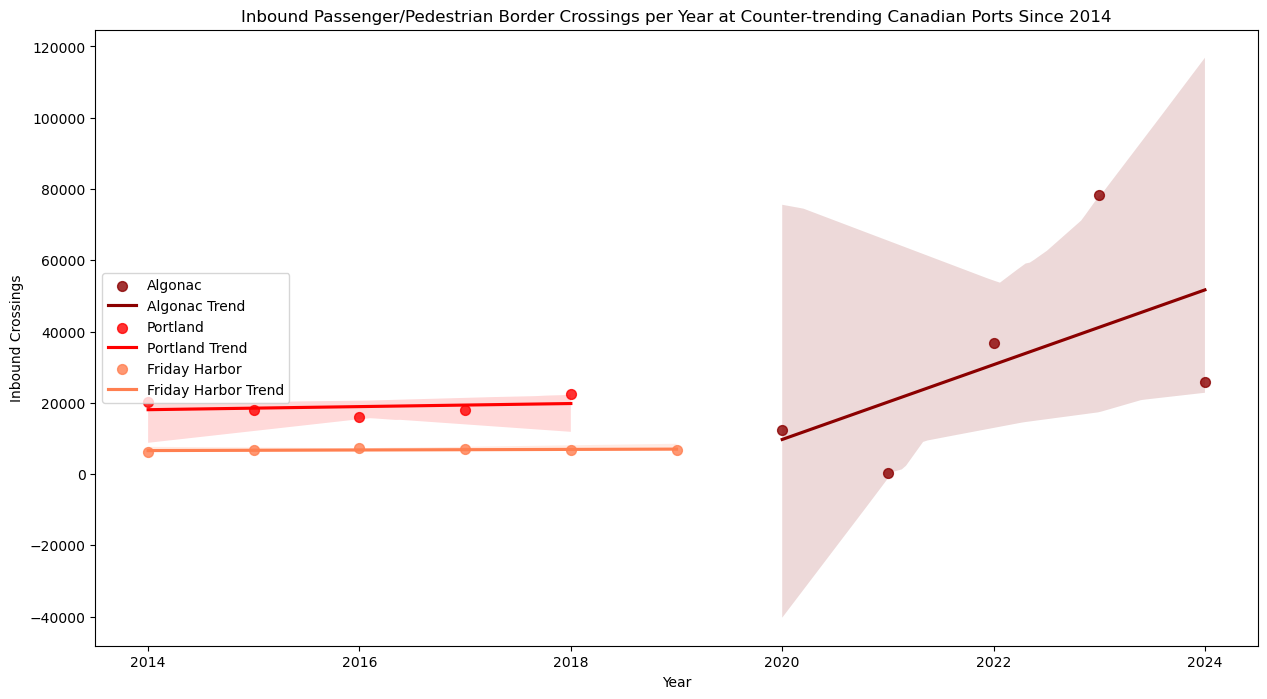

In [81]:
# might be clearer if we look at Mexico and Canada Ports plots separately

# Plotting Canadian crossings
plt.figure(figsize=(15, 8))

sns.regplot(x='Year', y='Value', data=algonac_df, label='Algonac', color='darkred', scatter_kws={'s':50}, line_kws={'label':"Algonac Trend"})
sns.regplot(x='Year', y='Value', data=portland_df, label='Portland', color='red', scatter_kws={'s':50}, line_kws={'label':"Portland Trend"})
sns.regplot(x='Year', y='Value', data=fridayhar_df, label='Friday Harbor', color='coral', scatter_kws={'s':50}, line_kws={'label':"Friday Harbor Trend"})


plt.xlabel('Year')
plt.ylabel('Inbound Crossings')
plt.title('Inbound Passenger/Pedestrian Border Crossings per Year at Counter-trending Canadian Ports Since 2014')
plt.legend(loc="center left")
plt.show()

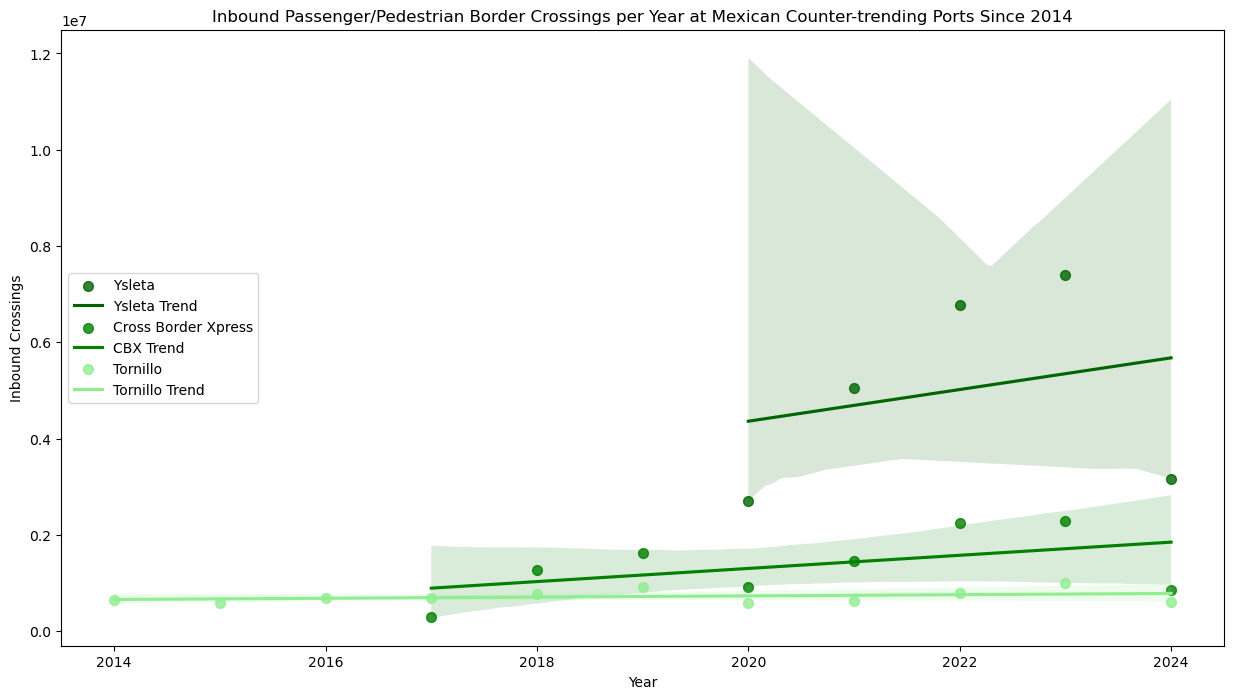

In [83]:
# It seems that Friday Harbor and Portland stopped processing crossings in 2019 and 2018, respectively. More 
# investigation would have to happen to see what that's about. Was there a consolidation to a different port
# location or name change? These are also ports that are near the bottom of the list of processing entries
# along the Canada border. Algonac seems to be trending up sharply since the pandemic and could possibly need more
# resources/staff.


# Plotting Mexican crossings
plt.figure(figsize=(15, 8))

sns.regplot(x='Year', y='Value', data=ysleta_df , label='Ysleta', color='darkgreen', scatter_kws={'s':50}, line_kws={'label':"Ysleta Trend"})
sns.regplot(x='Year', y='Value', data=xborderxp_df, label='Cross Border Xpress', color='green', scatter_kws={'s':50}, line_kws={'label':"CBX Trend"})
sns.regplot(x='Year', y='Value', data=tornillo_df, label='Tornillo', color='lightgreen', scatter_kws={'s':50}, line_kws={'label':"Tornillo Trend"})

plt.xlabel('Year')
plt.ylabel('Inbound Crossings')
plt.title('Inbound Passenger/Pedestrian Border Crossings per Year at Mexican Counter-trending Ports Since 2014')
plt.legend(loc="center left")
plt.show()

In [85]:
# these ports are near the bottom of volume totals for the Mexico border, but they are all trending upward in 
# the last ten years and, especially since the pandemic, could possibly need more staff/resources.


# conclusions to draw are Algonac at the northern border and Ysleta at the southern border are the crossings
# seeing the sharpest increases in the last 10 years. interestingly, it looks like each has only been active since
# 2020 and both saw significant drops from 2023 to 2024, likely because we are still in 2024.